# Main Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

In [2]:
plt.rcParams.update({'figure.max_open_warning': 0})
rg_palette = sns.color_palette(palette=['red', 'green'])
sns.set_theme(style='darkgrid', palette=rg_palette)

In [3]:
df = pd.read_csv('./input/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.info

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.isna().sum(axis=0)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
print('Number of catrgories per each feature: ')
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

Number of catrgories per each feature: 
class: 2
cap-shape: 6
cap-surface: 4
cap-color: 10
bruises: 2
odor: 9
gill-attachment: 2
gill-spacing: 2
gill-size: 2
gill-color: 12
stalk-shape: 2
stalk-root: 5
stalk-surface-above-ring: 4
stalk-surface-below-ring: 4
stalk-color-above-ring: 9
stalk-color-below-ring: 9
veil-type: 1
veil-color: 4
ring-number: 3
ring-type: 5
spore-print-color: 9
population: 6
habitat: 7


In [9]:
df.drop(columns=['veil-type'], inplace=True)

In [10]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [11]:
similar_distributions = [
    'cap-shape', 
    'gill-attachment', 
    'veil-color', 
    'ring-number'
]

opposite_distributions = [
    'bruises', 
    'odor', 
    'gill-size', 
    'spore-print-color'
]

distinctive_distributions = [
    "cap-surface",
    "gill-spacing",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "ring-type",
    "population",
    "habitat"
]

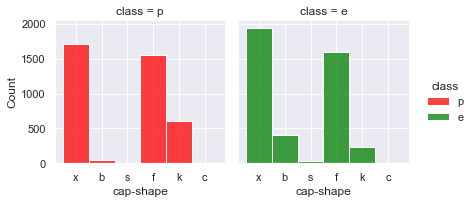

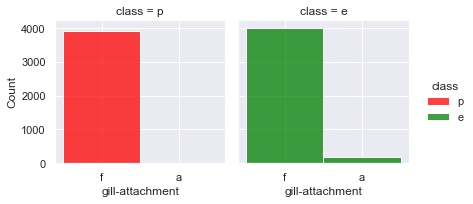

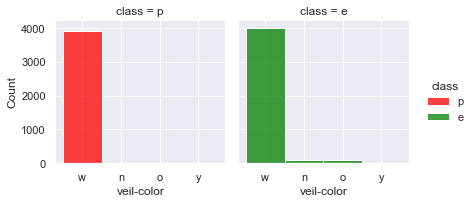

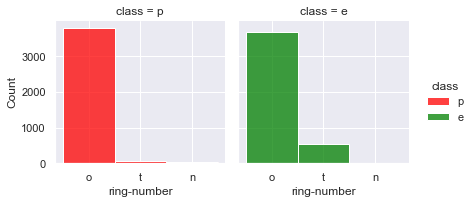

In [13]:
for col in similar_distributions:
    sns.displot(df, x=col, hue='class', col='class', binwidth=3, height=3)

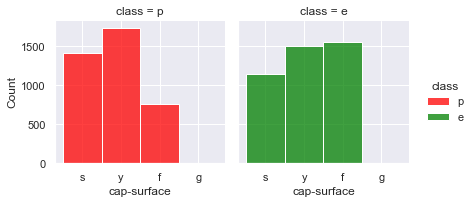

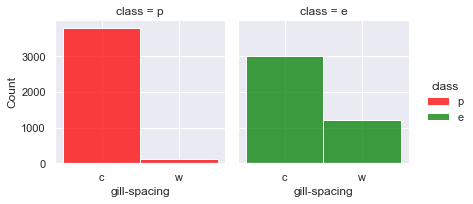

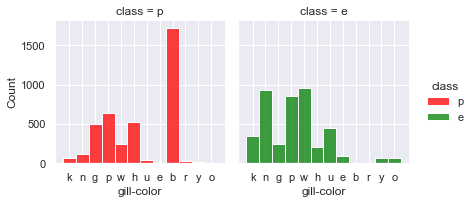

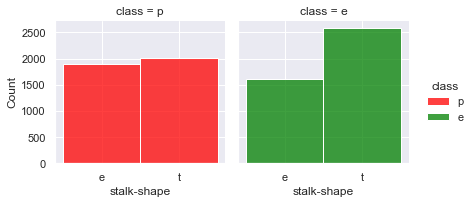

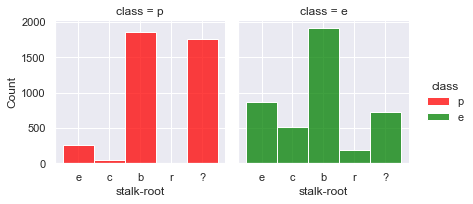

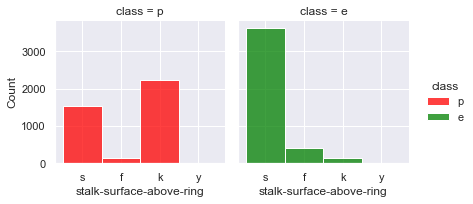

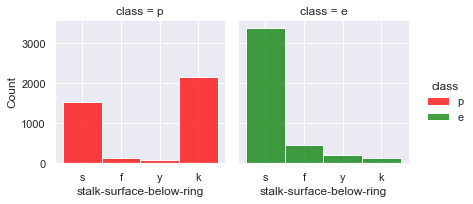

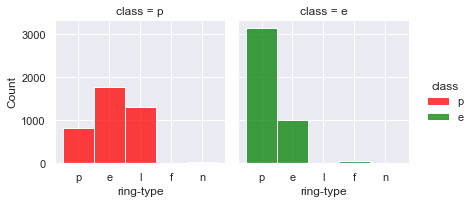

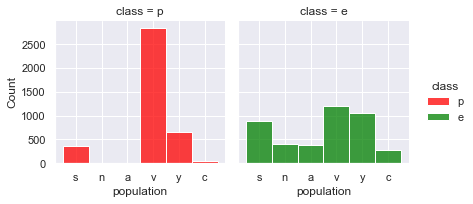

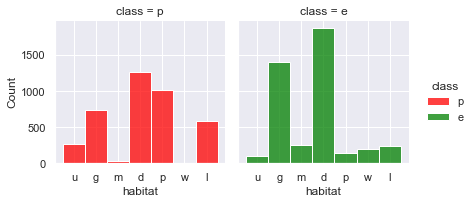

In [14]:
for col in distinctive_distributions:
    sns.displot(df, x=col, hue='class', col='class', binwidth=3, height=3)

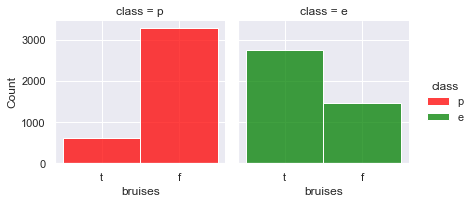

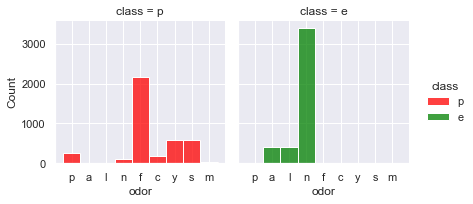

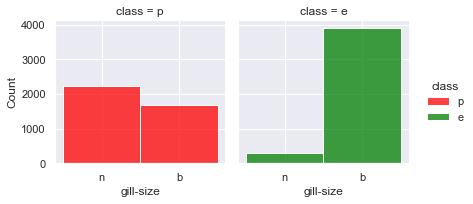

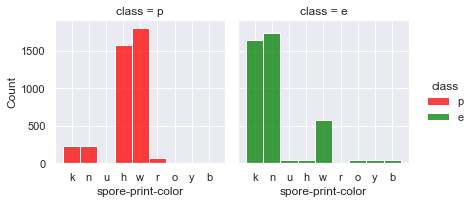

In [15]:
for col in opposite_distributions:
    sns.displot(df, x=col, hue='class', col='class', binwidth=3, height=3)

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
df_shuffled = df.sample(frac=1)
X, y = df_shuffled.drop(columns=['class']), df_shuffled['class'].copy()
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, \
                             GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, RFE, SelectKBest, chi2, mutual_info_classif

from xgboost import XGBClassifier

In [20]:
categories_for_each_column = [X[col].unique() for col in X]
categories_for_each_column

[array(['f', 'x', 'k', 'b', 's', 'c'], dtype=object),
 array(['y', 'f', 's', 'g'], dtype=object),
 array(['y', 'e', 'p', 'g', 'w', 'n', 'b', 'u', 'c', 'r'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 's', 'n', 'y', 'a', 'p', 'l', 'c', 'm'], dtype=object),
 array(['f', 'a'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['b', 'n'], dtype=object),
 array(['h', 'b', 'w', 'e', 'p', 'g', 'n', 'y', 'k', 'u', 'o', 'r'],
       dtype=object),
 array(['e', 't'], dtype=object),
 array(['b', '?', 'c', 'e', 'r'], dtype=object),
 array(['k', 's', 'f', 'y'], dtype=object),
 array(['k', 's', 'f', 'y'], dtype=object),
 array(['p', 'w', 'e', 'b', 'o', 'n', 'g', 'c', 'y'], dtype=object),
 array(['p', 'w', 'g', 'e', 'n', 'b', 'o', 'c', 'y'], dtype=object),
 array(['w', 'o', 'n', 'y'], dtype=object),
 array(['o', 't', 'n'], dtype=object),
 array(['l', 'e', 'p', 'f', 'n'], dtype=object),
 array(['h', 'w', 'n', 'k', 'b', 'y', 'u', 'r', 'o'], dtype=object),
 array(['v', 'c', 'n',

In [21]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [22]:
encoder = OneHotEncoder(categories=categories_for_each_column, sparse=False)
pipe = make_pipeline(encoder, SVC())

In [23]:
pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       1.00      1.00      1.00       781

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [24]:
cross_val_score(pipe, X, y, scoring='accuracy', cv=5)

array([1., 1., 1., 1., 1.])

In [25]:
import itertools

In [27]:
category_name_per_column = [[f'{col}-{category_name}' for category_name in categories_for_each_column[i]] for i, col in enumerate(X.columns)]
category_names = list(itertools.chain(*category_name_per_column))

In [28]:
X_oh = pd.DataFrame(encoder.transform(X), columns=category_names)
X_oh.head()

,cap-shape-f,cap-shape-x,cap-shape-k,cap-shape-b,cap-shape-s,cap-shape-c,cap-surface-y,cap-surface-f,cap-surface-s,cap-surface-g,...,population-y,population-s,population-a,habitat-g,habitat-d,habitat-w,habitat-p,habitat-l,habitat-m,habitat-u
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

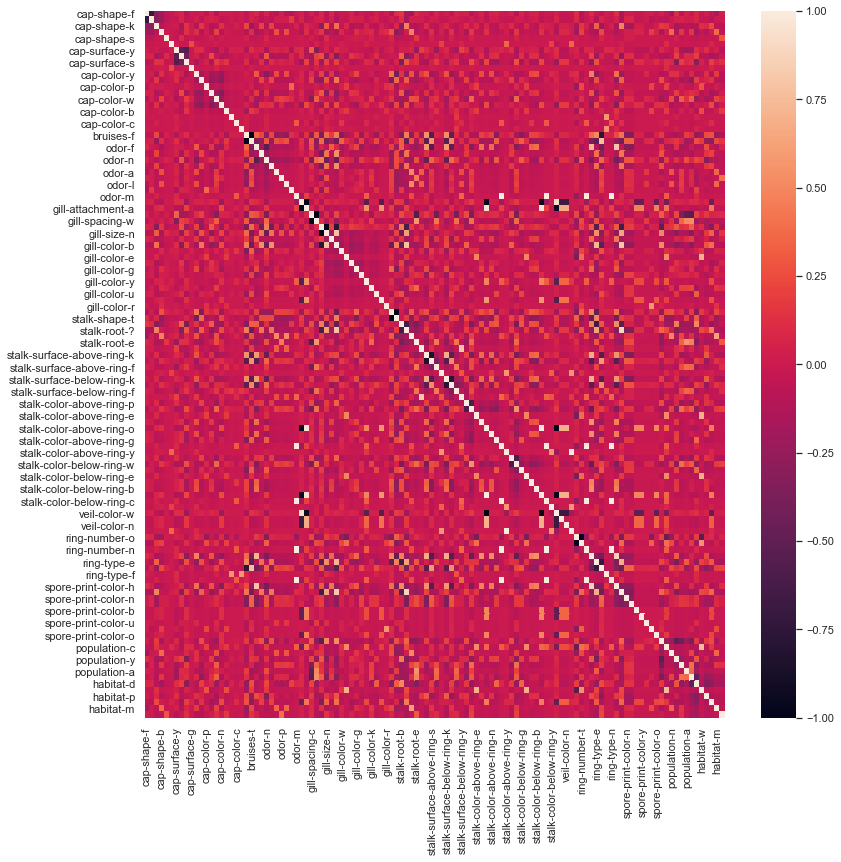

In [29]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(X_oh.corr(), vmin=-1, vmax=1, ax=ax)

In [32]:
def find_correlated_columns(df, threshold):
    corr = df.corr()
    corr_abs = corr.abs()
    col_pair_to_correlation = {}
    for col in df.columns:
        most_correlated_cols = corr.loc[col][corr_abs[col] >= threshold]
        most_correlated_cols = most_correlated_cols.index.drop(col)
        for correlated_col in most_correlated_cols:
            correlation_value = corr.loc[col, correlated_col]
            col_pair_to_correlation[tuple(sorted((col, correlated_col)))] = correlation_value
    return col_pair_to_correlation

In [33]:
find_correlated_columns(X_oh, 0.7)

{('cap-shape-f', 'cap-shape-x'): -0.720234723935757,
 ('bruises-f', 'bruises-t'): -1.0000000000000002,
 ('bruises-f', 'ring-type-p'): -0.7670361113113306,
 ('bruises-t', 'ring-type-p'): 0.7670361113113303,
 ('odor-f', 'ring-type-l'): 0.7239318535931037,
 ('odor-f', 'spore-print-color-h'): 0.7997515343521007,
 ('odor-m', 'stalk-color-above-ring-c'): 1.0,
 ('odor-m', 'stalk-color-below-ring-c'): 1.0,
 ('odor-m', 'ring-number-n'): 1.0,
 ('odor-m', 'ring-type-n'): 1.0,
 ('gill-attachment-a', 'gill-attachment-f'): -0.9999999999999999,
 ('gill-attachment-f', 'stalk-color-above-ring-o'): -0.9550973436312872,
 ('gill-attachment-f', 'stalk-color-below-ring-o'): -0.9550973436312872,
 ('gill-attachment-f', 'veil-color-w'): 0.9352375509363844,
 ('gill-attachment-a', 'stalk-color-above-ring-o'): 0.9550973436312872,
 ('gill-attachment-a', 'stalk-color-below-ring-o'): 0.9550973436312872,
 ('gill-attachment-a', 'veil-color-w'): -0.9352375509363848,
 ('gill-spacing-c', 'gill-spacing-w'): -1.0,
 ('gill-

In [34]:
num_jobs = 1

classifier_list = [LogisticRegression(n_jobs=num_jobs), 
                   SGDClassifier(alpha=0.01, n_jobs=num_jobs), 
                   DecisionTreeClassifier(), 
                   ExtraTreeClassifier(max_depth=5, min_samples_split=10, splitter='random'), 
                   RandomForestClassifier(n_estimators=100, n_jobs=num_jobs), 
                   GradientBoostingClassifier(n_estimators=100, loss='deviance')]

In [35]:
classifiers = []
rankings = []

In [36]:
for i in range(len(classifier_list)):
    print(f'{i} out of {len(classifier_list)}')
    classifier = classifier_list[i]
    
    rfe = RFE(classifier, n_features_to_select=1, step=1, verbose=0)
    rfe.fit(X_oh, y)
    
    rankings.append(rfe.ranking_)
    classifiers.append(classifier)
print('GAN_Done')

0 out of 6
1 out of 6
2 out of 6
3 out of 6
4 out of 6
5 out of 6
GAN_Done


In [37]:
classifiers

[LogisticRegression(n_jobs=1),
 SGDClassifier(alpha=0.01, n_jobs=1),
 DecisionTreeClassifier(),
 ExtraTreeClassifier(max_depth=5, min_samples_split=10),
 RandomForestClassifier(n_jobs=1),
 GradientBoostingClassifier()]

In [38]:
rankings

[array([106,  97, 114,  66,  57,  53, 108,  33,  89,  36,  86, 112,  41,
        115,  43,  67,  40,  69,  42,  70,  87,  98,   6,  27,   3,  26,
          2,  11,   1,  12,  68,  95,  94,  16,  21,  15,   7, 105,  17,
         74,  55,  73, 113,  61,  93,  72,  82,  99,  38,  48,  25,  19,
         44,  46, 109,  34,   8,  32,  39, 103,  64,  47,  29,  22,  81,
        111,  54,  88,  51,  90,  62,  65,  37,  77,  78,  63,  52,  24,
         96,  56,  58,   5,  85,  92,  91,  49, 110,  84,  75,  50,  45,
        107,  14,  76,  28,  83,  10,  13, 102, 101,   9,   4, 100,  80,
         18,  35,  23,  79, 116,  31,  59,  20,  60, 104,  30,  71]),
 array([ 94,  92,  93,  76,  37,  72,  91,  29,  90,  71,  74, 109,  27,
        108, 104,  89,  25,  48,  51,  47,  77,  52,  10,  31,   2,  30,
          1,   5,   3,   6,  35, 102, 116,  17,  14,  11,  23,  83,  15,
         66,  63,  67,  68,  64,  86,  65,  69, 113,  19,  62,  32,  16,
         70,  39, 101,  21,  13,  28,  33,  73, 107,  

In [39]:
def estimator_name(estimator): 
    str_representation = str(estimator)
    end_of_name_index = str_representation.index('(')
    return str_representation[:end_of_name_index]

In [40]:
d = {'feature': X_oh.columns}
for classifier, ranks in zip(classifiers, rankings):
    d[estimator_name(classifier)] = ranks
feature_rankings = pd.DataFrame(d)
feature_rankings

,feature,LogisticRegression,SGDClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,GradientBoostingClassifier
0,cap-shape-f,106,94,116,116,70,97
1,cap-shape-x,97,92,115,115,76,76
2,cap-shape-k,114,93,114,114,86,73
3,cap-shape-b,66,76,113,111,50,44
4,cap-shape-s,57,37,112,110,85,66
...,...,...,...,...,...,...,...
111,habitat-w,20,26,99,10,97,62
112,habitat-p,60,60,101,8,52,65
113,habitat-l,104,61,102,30,62,41
114,habitat-m,30,41,104,39,43,46


In [41]:
summed_rankings = feature_rankings.select_dtypes(int).sum(axis=1)
summed_rankings

0      599
1      571
2      594
3      460
4      467
      ... 
111    314
112    346
113    400
114    303
115    328
Length: 116, dtype: int64

In [43]:
sorted_rankings = [0] * len(summed_rankings)

for i, x in enumerate(sorted(range(len(summed_rankings)), key=lambda y: summed_rankings[y])):
    sorted_rankings[x] = i + 1
sorted_rankings[:10]

[116, 114, 115, 96, 97, 60, 80, 34, 67, 47]

In [44]:
feature_rankings['overall_ranking'] = sorted_rankings
feature_rankings

,feature,LogisticRegression,SGDClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,overall_ranking
0,cap-shape-f,106,94,116,116,70,97,116
1,cap-shape-x,97,92,115,115,76,76,114
2,cap-shape-k,114,93,114,114,86,73,115
3,cap-shape-b,66,76,113,111,50,44,96
4,cap-shape-s,57,37,112,110,85,66,97
...,...,...,...,...,...,...,...,...
111,habitat-w,20,26,99,10,97,62,41
112,habitat-p,60,60,101,8,52,65,53
113,habitat-l,104,61,102,30,62,41,74
114,habitat-m,30,41,104,39,43,46,38


In [45]:
feature_rankings.sort_values(by='overall_ranking', inplace=True)
feature_rankings.head()

,feature,LogisticRegression,SGDClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,overall_ranking
101,spore-print-color-r,4,4,4,21,12,7,1
24,odor-n,3,2,1,86,1,1,2
63,stalk-surface-below-ring-y,22,22,3,23,34,3,3
28,odor-l,1,3,6,79,24,4,4
26,odor-a,2,1,5,83,25,5,5


In [46]:
feature_rankings = feature_rankings.set_index('feature')
feature_rankings.head(10)

,LogisticRegression,SGDClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,overall_ranking
feature,,,,,,,
spore-print-color-r,4,4,4,21,12,7,1
odor-n,3,2,1,86,1,1,2
stalk-surface-below-ring-y,22,22,3,23,34,3,3
odor-l,1,3,6,79,24,4,4
odor-a,2,1,5,83,25,5,5
gill-size-b,15,11,8,68,3,16,6
stalk-root-c,46,39,2,37,21,2,7
spore-print-color-u,9,9,10,22,68,34,8
odor-f,6,10,44,90,2,9,9


In [47]:
print(distinctive_distributions)
print(opposite_distributions)

['cap-surface', 'gill-spacing', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type', 'population', 'habitat']
['bruises', 'odor', 'gill-size', 'spore-print-color']


TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


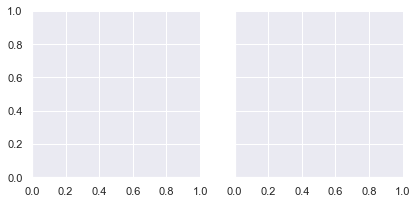

In [49]:
df_oh = pd.concat([X_oh.astype('category'), pd.Series(y, name='class')], axis=1)
for col in feature_rankings.index[:5]:
    sns.displot(
        data=df_oh,
        x=col,
        col="class",
        binwidth=3,
        height=3
    )

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

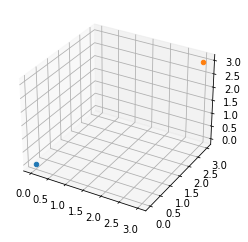

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(0,0,0)
ax.scatter(3,3,3)

In [4]:
import numpy as np

p1 = np.array((0,0,0))
p2 = np.array((3,3,3))

In [5]:
square = np.square(p1 - p2)
sum_square = np.sum(square)

In [6]:
distance = np.sqrt(sum_square)
distance

5.196152422706632